In [195]:
import gdal
import os
import glob
from gdalconst import *
import matplotlib.pyplot as plt
import numpy as np
# osgeo (gdal related)
# rasterio
# berkeley tree data

In [196]:
filename = '../data/raw/ortho_04_07_2018_4_bands_16bit.tif'

In [197]:
ds_all= gdal.Open(filename, GA_ReadOnly)

In [198]:
d

AttributeError: 'NoneType' object has no attribute 'GetMetadata'

In [35]:
print('X', ds_all.RasterXSize)
print('Y', ds_all.RasterXSize)
print('Bands', ds_all.RasterCount)

('X', 43757)
('Y', 43757)
('Bands', 4)


In [44]:
np.arange(1,4)

array([1, 2, 3])

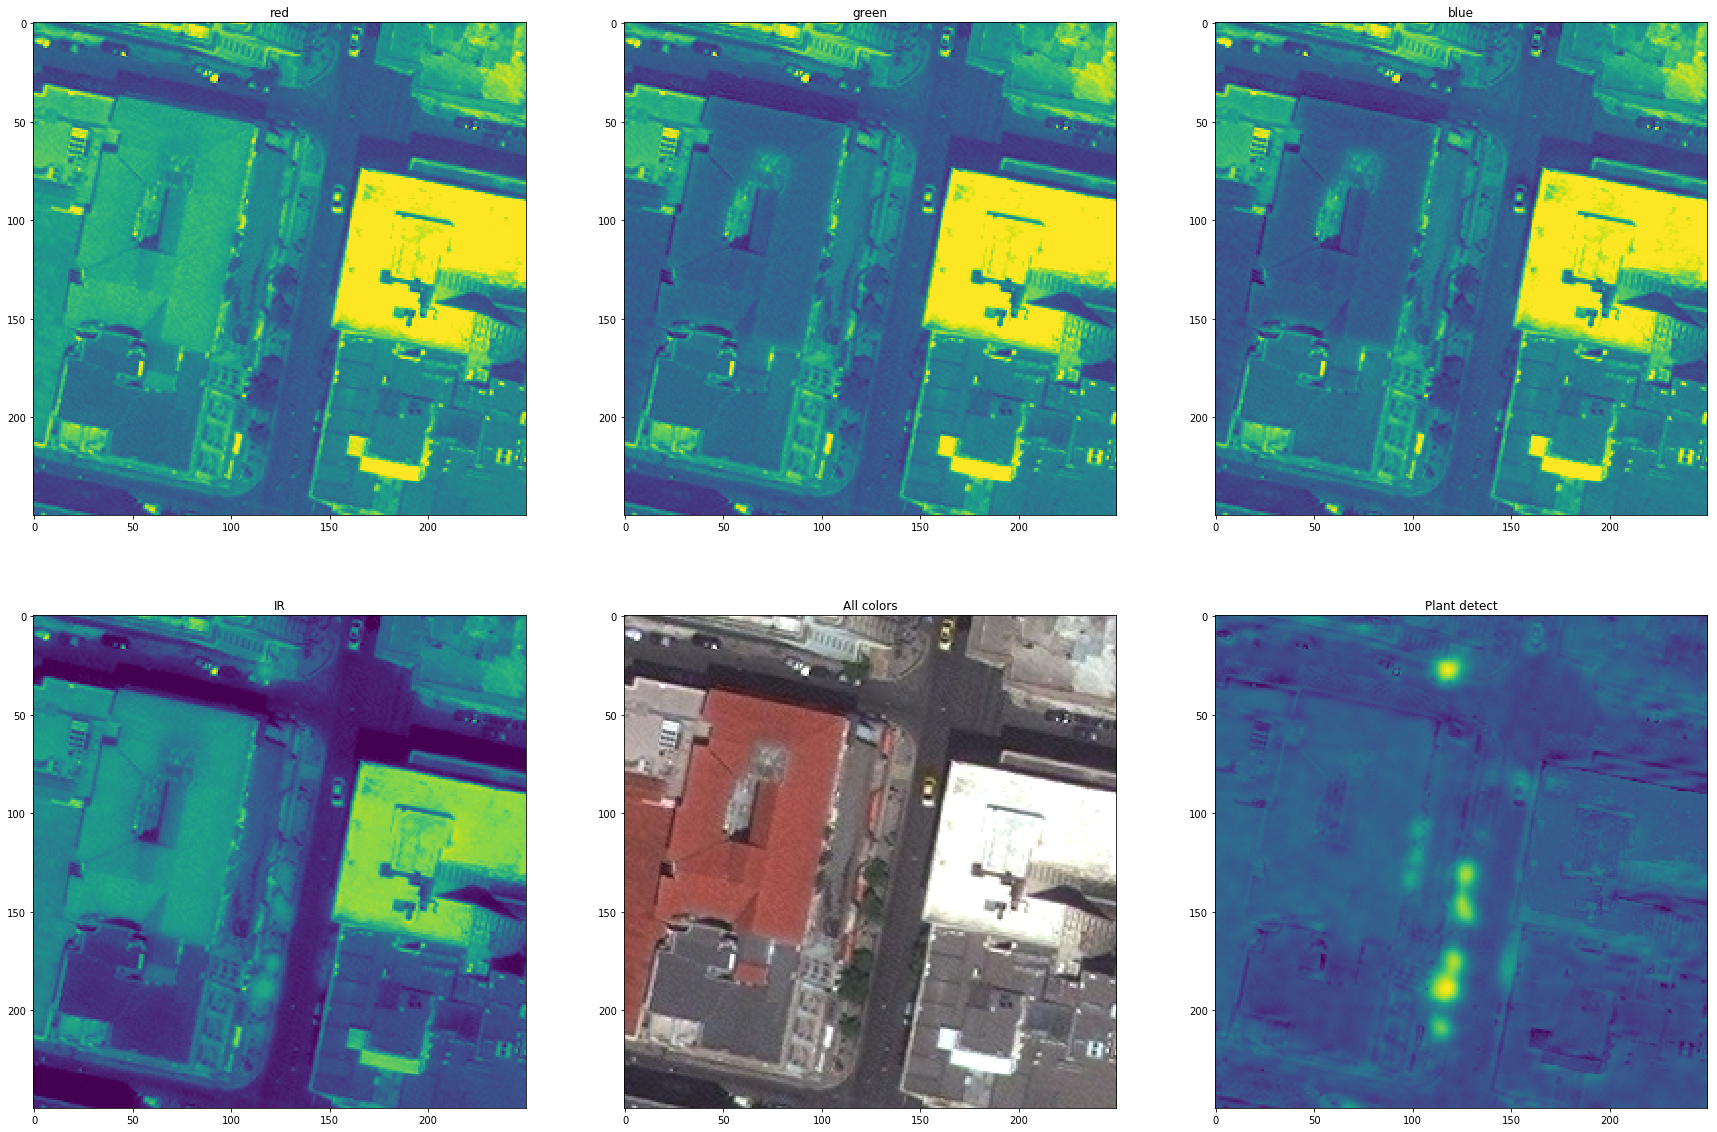

In [192]:
# band 1: red
# band 2: green
# band 3: blue
# band 4: ??
x_del = 250
y_del = 250
x_center = ds_all.RasterXSize // 2
y_center = ds_all.RasterYSize // 2
x_shift = 100
y_shift = -100
x_pos = x_center + x_shift
y_pos = y_center + y_shift
channels = 3
data_all = np.zeros((x_del, y_del, 4))
data_sum = np.zeros((x_del, y_del))
color_scheme = ['red', 'green', 'blue',  'IR']
fig, axs = plt.subplots(2,3,figsize=(30,20))
axs = np.reshape(axs, [6,])
for index in np.arange(0,4):
    band_num = index + 1
#     print('band:', band_num)
    band = ds_all.GetRasterBand(band_num)
    data = band.ReadAsArray(x_pos, y_pos, x_del, y_del)
    # grab data
    data_all[:, :, index] =  data
    # plot it
    plt.subplot(2, 3, index+1)
    plt.title(color_scheme[index])
    imgplot = plt.imshow(data)
#     fig.colorbar(imgplot, ax=axs[index])
#     plt.colorbar(imgplot, ax=axs[index])
# scale data
data_all = data_all / np.max(data_all)
# plot it
plt.subplot(2, 3, 5)
plt.title('All colors')
imgplot = plt.imshow(data_all[:,:,:3])
# plt.show()
# plot it
data_ave = (data_all[:,:,0] + data_all[:,:,1] + data_all[:,:,2]) / 3
plt.subplot(2, 3, 6)
data_plant = (3*data_all[:,:,1] + data_all[:,:,3]) / 4 - data_ave
imgplot = plt.imshow(data_plant)
plt.title('Plant detect')
plt.show()

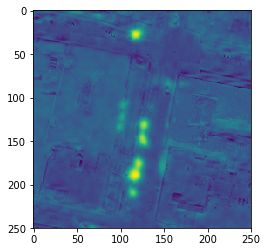

In [193]:
# imgplot = plt.imshow(data_all[:,:,3]-data_ave)
plt.show()
# imgplot = plt.imshow(data_all[:,:,1]-data_ave)
plt.show()
imgplot = plt.imshow((3*data_all[:,:,1] + data_all[:,:,3]) / 4 -data_ave)
plt.show()

In [111]:
def attempt_color(r, g, b):
    data_r = ds_all.GetRasterBand(r).ReadAsArray(x_pos, y_pos, x_del, y_del)
    data_g = ds_all.GetRasterBand(g).ReadAsArray(x_pos, y_pos, x_del, y_del)
    data_b = ds_all.GetRasterBand(b).ReadAsArray(x_pos, y_pos, x_del, y_del)
    data = [data_r, data_g, data_b]
    data_rgb = np.zeros((x_del, y_del, 3))
    for (data_id, data) in enumerate(data):
        data_rgb[:, :, data_id] = data
    data_rgb /= np.max(data_rgb)
    imgplot = plt.imshow(data_rgb)
    print('r', r, 'g', g, 'b', b)
    plt.show()

In [ ]:
ds.GetMetadata()

In [ ]:
# try and break up tiff
filename = '../data/raw/ortho_04_07_2018_4_bands_16bit.tif'
outpath = '../raster_out'
outname = outpath + '/tile_'
ds = gdal.Open(filename)

if not os.path.exists(outpath):
    os.makedirs(outpath)
tile_size_x = ds.RasterXSize//1000
tile_size_y = ds.RasterYSize//1000

band = ds.GetRasterBand(1)
xsize = band.XSize
ysize = band.YSize

for i in range(0, xsize//100, 2*tile_size_x):
# for i in range(0, x, tile_size_x):
    for j in range(0, ysize//100, 2*tile_size_y):
#     for j in range(0, ysize, tile_size_y):
        com_string = ("gdal_translate -of GTIFF -srcwin " + str(i)+ ", " + str(j) + 
                      ", " + str(tile_size_x) + ", " + str(tile_size_y) + " " 
                      + filename + " " + str(outname) 
                      + str(i) + "_" + str(j) + ".tif")
        os.system(com_string)
print('com string example:\n', com_string)

In [ ]:
# Try and open a tif

In [16]:
all_files = glob.glob('./raster_out/*tif')
print('num files:', len(all_files))

('num files:', 36)


In [17]:
print(data.shape)

(10, 10)


In [18]:
data_temp = ds

NameError: name 'ds' is not defined

New image
(4, 43, 43)
0


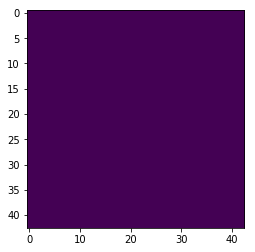

1


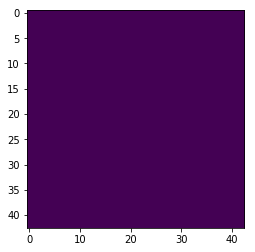

2


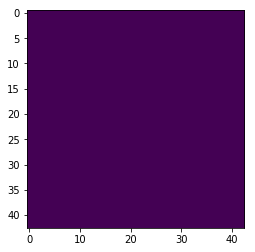

3


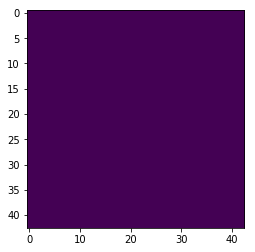

4


IndexError: index 4 is out of bounds for axis 0 with size 4

In [19]:
bands = data.shape[0]

for ii in range(10):
    subsample = all_files[ii]
    ds_sub = gdal.Open(subsample, GA_ReadOnly)
    data = ds_sub.ReadAsArray()
    print('New image')
    print(data.shape)
    for jj in range(bands):
        print(jj)
        imgplot = plt.imshow(data[jj, :, :])
        plt.show()